In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
AUTOTUNE = tf.data.AUTOTUNE

In [2]:
data_dir = "train"

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(150, 150),
  batch_size=32)

Found 4767 files belonging to 12 classes.
Using 3814 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(150, 150),
  batch_size=32)

Found 4767 files belonging to 12 classes.
Using 953 files for validation.


In [5]:
train_ds

<BatchDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int32)>

In [9]:
class_names = train_ds.class_names
print(class_names)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


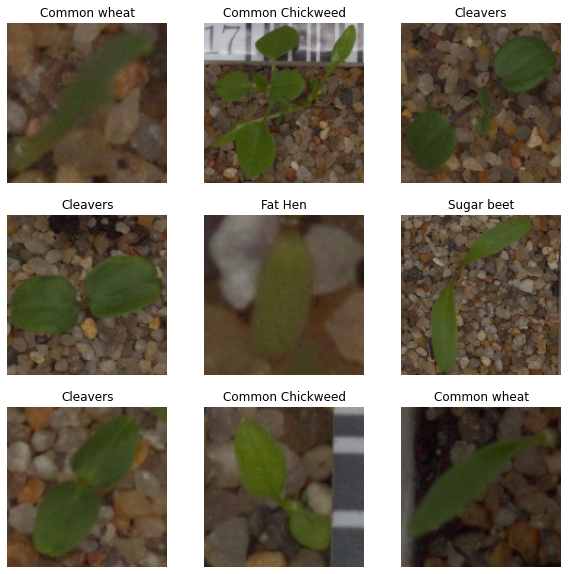

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [13]:
# Augmentation layer help us to make additional training..
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(150, 
                                                              150,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [14]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(12)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
120/120 [==============================] - 71s 595ms/step - loss: 0.3756 - accuracy: 0.8658 - val_loss: 0.5594 - val_accuracy: 0.8227
Epoch 2/30
120/120 [==============================] - 72s 599ms/step - loss: 0.3715 - accuracy: 0.8713 - val_loss: 0.6440 - val_accuracy: 0.8132
Epoch 3/30
120/120 [==============================] - 73s 605ms/step - loss: 0.3489 - accuracy: 0.8791 - val_loss: 0.5992 - val_accuracy: 0.8185
Epoch 4/30
120/120 [==============================] - 72s 598ms/step - loss: 0.3718 - accuracy: 0.8681 - val_loss: 0.5065 - val_accuracy: 0.8458
Epoch 5/30
120/120 [==============================] - 71s 594ms/step - loss: 0.3593 - accuracy: 0.8794 - val_loss: 0.5843 - val_accuracy: 0.8269
Epoch 6/30
120/120 [==============================] - 72s 597ms/step - loss: 0.3436 - accuracy: 0.8841 - val_loss: 0.5708 - val_accuracy: 0.8269
Epoch 7/30
120/120 [==============================] - 72s 597ms/step - loss: 0.3288 - accuracy: 0.8825 - val_loss: 0.5442 - val_ac

In [19]:
model.evaluate(val_ds)

30/30 [==============================] - 4s 138ms/step - loss: 0.4964 - accuracy: 0.8363


[0.4963817298412323, 0.8363063931465149]